## Julia programming language cheatsheet

#### Help

In [ ]:
# Jupyter notebook:
# CTRL+Enter -> evaluate current cell
# SHIFT+Enter -> evaluate current cell and advance to next cell
# In[*] at the left of a cell means code is running. Please wait

In [ ]:
# type ? followed by function name to get help in an empty cell or in Julia REPL(read-eval-print-loop/console)

In [ ]:
?sin

In [ ]:
pwd() # show current working directory
cd(raw"C:\Julia 1.5.1") # change current directory (notice the string doesn't end with \)
@info pwd()

In [25]:
# Useful links:
# Official Julia release (download and install)
# https://julialang.org/

# Official Julia language documentation:
# https://docs.julialang.org/en/v1/

# Packages, doc search, function search:
# https://juliahub.com/ui/Home

# Official Julia language forum:
# https://discourse.julialang.org/

#### Variables

In [ ]:
# variable binding
a = 1
a,b = 2,3

# empty vector of "Any" type
b = []

# user defined matrix
a = [1 2 3; 4 5 6] # two lines, three columns. separate lines with ;

# preallocated vector of Float64 with 5 elements
c = zeros(Float64, 5)
# or
c = Array{Float64, 1}(undef, 5) # preallocate an array of Float64 with "1" dimension: "5" elements(Vector). The array contains garbage Float64 elements.

# preallocated Array of FLoat64 (matrix or multidimensional array)
c = zeros(Float64, 5,5)
# or
c = Array{Float64, 2}(undef, 5, 5) # preallocate an array of Float64 with "2" dimensions: "5" rows and 5 columns. The array contains garbage Float64 elements.

# add an element to the end of an array
push!(b, 4)

# There is no clear/clear all/ clear vars command. If you need to release the memory used by some variable just assign the value "nothing" to it
c = nothing # the garbage collector will take care of freeing memory. if you want to explicitly invoke it: GC.gc()

# Ranges; ranges are lazy collections that store only the start/end of arrays and their length, in order to avoid memory allocation
d = 1:10
# one can materialize a range into an array by using the "collect" function
e = collect(d)

# Strings vs chars
x = "this is a string"
y = 'c'

# String concatenation
"string1" * "string2"

# String interpolation; $variable_name lets you concatenate a value inside a string
x = 20
age = "my age is $x"


#### Functions

In [ ]:
# Short definitions
f(x) = 2x # notice the omission of "*"; Julia lets you do that
f(2)

# Typical definition for multi-line function. The result of the last expression of the function will be returned. 
# Otherwise you can explicitly write "return your_variable"
function my_func(x)
    a = 2*x
    b = sqrt(a)
    return a, b
end

# Multimethods
g(x::Int64) = 2x
g(x::Float64) = x + 3.0

@info g(2)
@info g(2.0)

#### Composite types

In [ ]:
mutable struct MyStruct
    x
    y
end

data = MyStruct(1,2)

#### Operator broadcasting

In [ ]:
# Julia lets you apply any function over a collection using the "." notation
# Let's apply some functions over a vector
a = [1, 2, 3, 4]
res_sin = sin.(a)
res_exp = exp.(a)

# Now let's sum the the two results, element to element
res = res_sin .+ res_exp

#### Loops and conditionals

In [ ]:
# LOOPS INTRODUCE LOCAL VARIABLE SCOPES
a=0
for i=1:10
    a=i
    println(a)
end

a = 1:10
for i in a
    println(i)
end

b=true
while b
    println("gotcha, I'm an infinite loop")
    sleep(0.1) # pause execution for 100ms
end

c = true
if c
    println("c is true")
else
    println("c is false")
end

d = 3
e = 5
if d < e
    println("d is smaller than $e") 
elseif d == e
    println("d is equal to $e")
else
    println("d is greater than $e")
end

#### Macros

In [ ]:
# decorators starting with "@" are called macros. Examples:
@info x = 1 # pretty prints the value of x in the console
@time sum([1,2,4,4]) # displays the elapsed time and memory allocation of an expression; useful in benchmarking

#### Plots

In [ ]:
# DOCUMENTATION: http://docs.juliaplots.org/latest/generated/attributes_series/
using Plots # make the Plots library available
gr() # gr backend
# plotly() # plotly backend offers more tools such as zoom/pan

x = 0.0:2e-3:1
y = exp.(-x/0.2) .* sin.(2*pi*10*x)

h=plot(x, y; markershape=:circle, label="my decaying sine wave", background_color = :gray); # :gray is called "symbol"(special string)
title!("very informative title");
xlabel!("this is the x label [unit]");
ylabel!("this is the y label [unit]");
display(h) # for gr backend
# gui() # for plotly backend

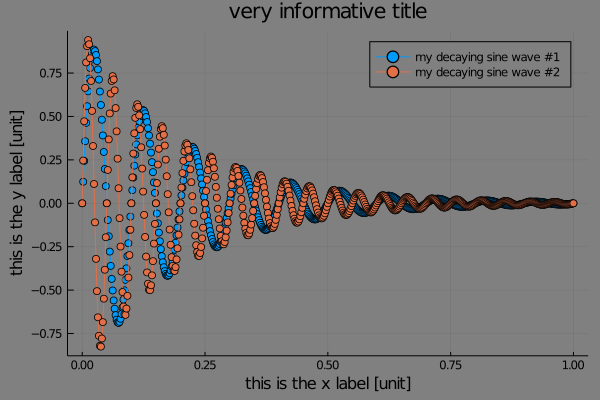

In [4]:
# multiple lines on the same axis; notice the plot! function
x = 0.0:2e-3:1
y1 = exp.(-x/0.2) .* sin.(2*pi*10*x)
y2 = exp.(-x/0.2) .* sin.(2*pi*20*x)
h=plot(x, y1; markershape=:circle, label="my decaying sine wave #1", background_color = :gray); # :gray is called "symbol"(special string)
h=plot!(x, y2; markershape=:circle, label="my decaying sine wave #2", background_color = :gray); # :gray is called "symbol"(special string)
title!("very informative title");
xlabel!("this is the x label [unit]");
ylabel!("this is the y label [unit]");
display(h)

#### Saving data in .csv files

In [ ]:
using CSV
using DataFrames

diode_volt = 0:0.1:1
diode_crt = exp.(diode_volt)

df = DataFrame("Voltage [V]" => diode_volt, "Current [A]" => diode_crt)
CSV.write("C:\\Julia 1.5.1\\dioda.csv", df) # NOTICE THE DOUBLE SLASH!